<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(0_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,45.401798,57.958842,64.905841,0.100256,178.366738,177.931216,0.435521
1,0.0,1.0,43.006052,28.370048,68.202480,0.509469,150.088048,149.128447,0.959602
2,0.0,2.0,52.071147,38.206212,52.394608,1.357702,154.029669,151.926629,2.103040
3,0.0,3.0,96.558507,79.981600,25.994930,-6.735503,205.799533,211.769717,-5.970184
4,0.0,4.0,41.552209,79.135375,68.426678,1.740991,200.855252,198.970163,1.885090
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,50.052080,27.453883,87.473108,0.205086,175.184157,174.641414,0.542743
59996,999.0,56.0,80.886971,93.261024,70.827683,-1.719256,253.256422,254.708976,-1.452554
59997,999.0,57.0,64.258822,63.024567,83.431063,1.096682,221.811135,220.253510,1.557625
59998,999.0,58.0,32.126723,26.456932,87.563022,0.208525,156.355203,155.785199,0.570004


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    45.401798  57.958842  64.905841  0.100256  178.366738   
      1.0    43.006052  28.370048  68.202480  0.509469  150.088048   
      2.0    52.071147  38.206212  52.394608  1.357702  154.029669   
      3.0    96.558507  79.981600  25.994930 -6.735503  205.799533   
      4.0    41.552209  79.135375  68.426678  1.740991  200.855252   
...                ...        ...        ...       ...         ...   
999.0 55.0   50.052080  27.453883  87.473108  0.205086  175.184157   
      56.0   80.886971  93.261024  70.827683 -1.719256  253.256422   
      57.0   64.258822  63.024567  83.431063  1.096682  221.811135   
      58.0   32.126723  26.456932  87.563022  0.208525  156.355203   
      59.0   61.974268  49.007905  77.466858 -0.952262  197.496770   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    177.931216  0.435521  
      1.0    149.128447  0.959602  
      2.0    151.926629  2.103040  
      3.0    211.769717 -5.970184  
      4.0    198.970163  1.885090  
...                 ...       ...  
999.0 55.0   174.641414  0.542743  
      56.0   254.708976 -1.452554  
      57.0   220.253510  1.557625  
      58.0   155.785199  0.570004  
      59.0   198.282473 -0.785704  

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    45.401798  57.958842  64.905841  0.100256  178.366738   
      1.0    43.006052  28.370048  68.202480  0.509469  150.088048   
      2.0    52.071147  38.206212  52.394608  1.357702  154.029669   
      3.0    96.558507  79.981600  25.994930 -6.735503  205.799533   
      4.0    41.552209  79.135375  68.426678  1.740991  200.855252   
...                ...        ...        ...       ...         ...   
999.0 55.0   50.052080  27.453883  87.473108  0.205086  175.184157   
      56.0   80.886971  93.261024  70.827683 -1.719256  253.256422   
      57.0   64.258822  63.024567  83.431063  1.096682  221.811135   
      58.0   32.126723  26.456932  87.563022  0.208525  156.355203   
      59.0   61.974268  49.007905  77.466858 -0.952262  197.496770   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    177.931216  0.435521  
      1.0    149.128447  0.959602  
      2.0    151.926629  2.103040  
      3.0    211.769717 -5.970184  
      4.0    198.970163  1.885090  
...                 ...       ...  
999.0 55.0   174.641414  0.542743  
      56.0   254.708976 -1.452554  
      57.0   220.253510  1.557625  
      58.0   155.785199  0.570004  
      59.0   198.282473 -0.785704  

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,45.401798,57.958842,64.905841,0.100256,178.366738,177.931216,0.435521
1,0.0,1.0,43.006052,28.370048,68.202480,0.509469,150.088048,149.128447,0.959602
2,0.0,2.0,52.071147,38.206212,52.394608,1.357702,154.029669,151.926629,2.103040
3,0.0,3.0,96.558507,79.981600,25.994930,-6.735503,205.799533,211.769717,-5.970184
4,0.0,4.0,41.552209,79.135375,68.426678,1.740991,200.855252,198.970163,1.885090
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,50.052080,27.453883,87.473108,0.205086,175.184157,174.641414,0.542743
59996,999.0,56.0,80.886971,93.261024,70.827683,-1.719256,253.256422,254.708976,-1.452554
59997,999.0,57.0,64.258822,63.024567,83.431063,1.096682,221.811135,220.253510,1.557625
59998,999.0,58.0,32.126723,26.456932,87.563022,0.208525,156.355203,155.785199,0.570004


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    45.401798  57.958842  64.905841  0.100256  178.366738   
      1.0    43.006052  28.370048  68.202480  0.509469  150.088048   
      2.0    52.071147  38.206212  52.394608  1.357702  154.029669   
      3.0    96.558507  79.981600  25.994930 -6.735503  205.799533   
      4.0    41.552209  79.135375  68.426678  1.740991  200.855252   
...                ...        ...        ...       ...         ...   
999.0 55.0   50.052080  27.453883  87.473108  0.205086  175.184157   
      56.0   80.886971  93.261024  70.827683 -1.719256  253.256422   
      57.0   64.258822  63.024567  83.431063  1.096682  221.811135   
      58.0   32.126723  26.456932  87.563022  0.208525  156.355203   
      59.0   61.974268  49.007905  77.466858 -0.952262  197.496770   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    177.931216  0.435521  
      1.0    149.128447  0.959602  
      2.0    151.926629  2.103040  
      3.0    211.769717 -5.970184  
      4.0    198.970163  1.885090  
...                 ...       ...  
999.0 55.0   174.641414  0.542743  
      56.0   254.708976 -1.452554  
      57.0   220.253510  1.557625  
      58.0   155.785199  0.570004  
      59.0   198.282473 -0.785704  

[60000 rows x 7 columns]

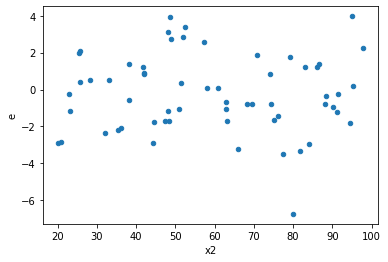

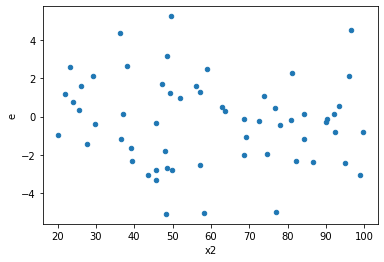

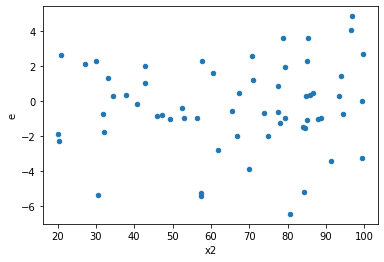

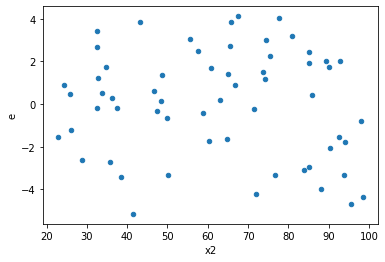

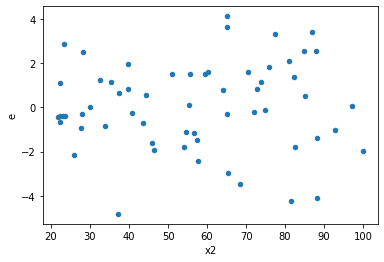

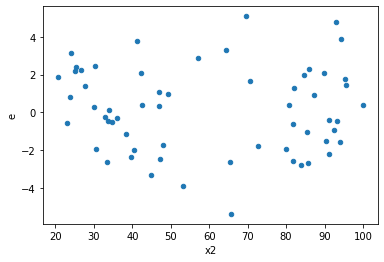

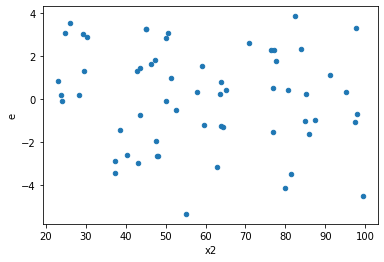

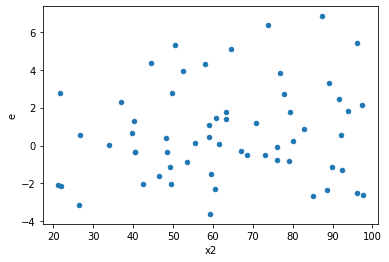

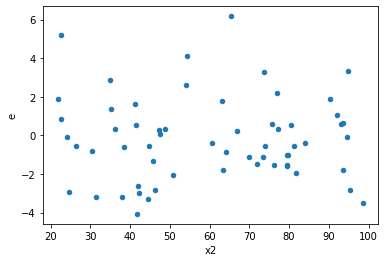

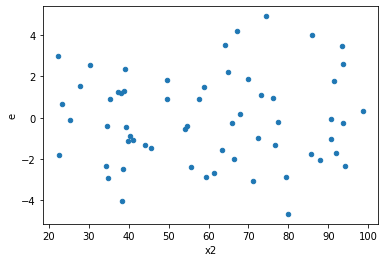

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,18.0,36.0,46.22315424831052,176.13124968122753,2.567953013795029,4.892534713367431,1.9052275049756608,0.098190616201421,0.9509046918992895,0.0490953081007105,Reject001=1 : Homoscedasticity
1.0,22.0,32.0,109.96915692722072,168.27277197827738,4.998598042146397,5.258524124321168,1.0519997967396393,0.8786215526812968,0.5606892236593516,0.4393107763406484,Reject001=1 : Homoscedasticity
3.0,39.0,15.0,242.46488375483202,98.50703102332615,6.217048301405949,6.567135401555077,1.0563108219812218,0.950843537541286,0.524578231229357,0.475421768770643,Reject001=1 : Homoscedasticity
4.0,34.0,20.0,126.39475490115288,82.7275073248152,3.717492791210379,4.1363753662407605,1.1126787860949685,0.8185066748342464,0.5907466625828768,0.4092533374171232,Reject001=1 : Homoscedasticity
5.0,29.0,25.0,128.037146314385,137.04744297364303,4.415074010840862,5.481897718945721,1.241632123376722,0.5864506257740945,0.7067746871129528,0.29322531288704723,Reject001=1 : Homoscedasticity
7.0,22.0,32.0,115.15951164646486,217.68022120080926,5.234523256657494,6.802506912525289,1.2995466022380484,0.48927563712761013,0.7553621814361949,0.24463781856380507,Reject001=1 : Homoscedasticity
8.0,28.0,26.0,116.97712612862,134.81497220981223,4.177754504593572,5.185191238838931,1.2411431148330165,0.5825488315024407,0.7087255842487796,0.2912744157512204,Reject001=1 : Homoscedasticity
10.0,33.0,21.0,154.92644501392448,113.36113007199835,4.694740757997711,5.3981490510475405,1.1498289957441292,0.7497290757686259,0.625135462115687,0.37486453788431295,Reject001=1 : Homoscedasticity
12.0,20.0,34.0,94.22143212531897,161.67648329158402,4.711071606265948,4.755190685046589,1.009364977327443,0.9539021682867239,0.523048915856638,0.47695108414336196,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,18.0,36.0,46.22315424831052,176.13124968122753,2.567953013795029,4.892534713367431,1.9052275049756608,0.098190616201421,Reject001=1 : Homoscedasticity
1.0,22.0,32.0,109.96915692722072,168.27277197827738,4.998598042146397,5.258524124321168,1.0519997967396393,0.8786215526812968,Reject001=1 : Homoscedasticity
2.0,39.0,15.0,243.36250889252523,71.2587437425449,6.24006433057757,4.75058291616966,0.7613035161978776,0.4812040899873853,Reject001=1 : Homoscedasticity
3.0,39.0,15.0,242.46488375483202,98.50703102332615,6.217048301405949,6.567135401555077,1.0563108219812218,0.950843537541286,Reject001=1 : Homoscedasticity
4.0,34.0,20.0,126.39475490115288,82.7275073248152,3.717492791210379,4.1363753662407605,1.1126787860949685,0.8185066748342464,Reject001=1 : Homoscedasticity
5.0,29.0,25.0,128.037146314385,137.04744297364303,4.415074010840862,5.481897718945721,1.241632123376722,0.5864506257740945,Reject001=1 : Homoscedasticity
6.0,35.0,19.0,203.8030954942478,58.135262484278726,5.822945585549937,3.059750657067301,0.5254644083675271,0.09701588795649872,Reject001=1 : Homoscedasticity
7.0,22.0,32.0,115.15951164646486,217.68022120080926,5.234523256657494,6.802506912525289,1.2995466022380484,0.48927563712761013,Reject001=1 : Homoscedasticity
8.0,28.0,26.0,116.97712612862,134.81497220981223,4.177754504593572,5.185191238838931,1.2411431148330165,0.5825488315024407,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      977
Reject001=0 : Heteroscedasticity     23
Name: Result_test, dtype: int64